<a href="https://colab.research.google.com/github/LisBla/ejemplo-git-pull/blob/main/Fermentacion_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.dpi'] = 200


df = pd.read_excel('/content/C9-NG6.7-N9 00624.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11011 entries, 0 to 11010
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time [h]   11011 non-null  float64
 1   m_do       11011 non-null  float64
 2   m_ph       11011 non-null  float64
 3   m_stirrer  11011 non-null  int64  
 4   m_temp     11011 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 430.2 KB


In [25]:
headers = ["Tiempo(H)","dO2", "pH", "Agitacion", "Temperatura"]
print("headers\n", headers)

headers
 ['Tiempo(H)', 'dO2', 'pH', 'Agitacion', 'Temperatura']


In [26]:
df.columns = headers
df.head()

,Tiempo(H),dO2,pH,Agitacion,Temperatura
0,0.233417,96.099998,6.29,200,28.600000
1,0.250167,96.099998,6.29,200,28.600000
2,0.266889,96.099998,6.30,200,28.700001
3,0.283361,96.199997,6.30,200,28.700001
4,0.300083,96.599998,6.30,200,28.799999


In [27]:
df.tail()

,Tiempo(H),dO2,pH,Agitacion,Temperatura
11006,183.666806,0.1,5.64,300,29.0
11007,183.683528,0.1,5.64,300,29.0
11008,183.700250,0.1,5.64,300,29.0
11009,183.716750,0.1,5.64,300,29.0
11010,183.733444,0.1,5.64,300,29.0


In [28]:
print(df.shape)

(11011, 5)


In [29]:
print(df.dtypes)

Tiempo(H)      float64
dO2            float64
pH             float64
Agitacion        int64
Temperatura    float64
dtype: object


In [30]:
df.describe()

,Tiempo(H),dO2,pH,Agitacion,Temperatura
count,11011.000000,11011.000000,11011.000000,11011.000000,11011.000000
mean,91.983473,10.999955,5.618317,246.577967,28.996776
std,52.979108,27.769516,0.304872,20.878651,0.062317
min,0.233417,0.000000,5.240000,0.000000,28.600000
25%,46.108444,0.100000,5.380000,250.000000,29.000000
50%,91.983556,0.100000,5.520000,250.000000,29.000000
75%,137.858500,0.100000,5.780000,250.000000,29.000000
max,183.733444,97.800003,6.300000,300.000000,29.100000


In [31]:
df.describe(include='all')

,Tiempo(H),dO2,pH,Agitacion,Temperatura
count,11011.000000,11011.000000,11011.000000,11011.000000,11011.000000
mean,91.983473,10.999955,5.618317,246.577967,28.996776
std,52.979108,27.769516,0.304872,20.878651,0.062317
min,0.233417,0.000000,5.240000,0.000000,28.600000
25%,46.108444,0.100000,5.380000,250.000000,29.000000
50%,91.983556,0.100000,5.520000,250.000000,29.000000
75%,137.858500,0.100000,5.780000,250.000000,29.000000
max,183.733444,97.800003,6.300000,300.000000,29.100000


In [32]:
df[['pH']].describe()

,pH
count,11011.000000
mean,5.618317
std,0.304872
min,5.240000
25%,5.380000
50%,5.520000
75%,5.780000
max,6.300000


El pH es una variable que nos indica en una fermentación que tan activo se encuentra el microorganismo en el medio de cultivo.
Con los datos brindados por el analisis estadistico, en especial el min y max, podemos observar que no hubo mucha variabilidad en el pH.
Sin embargo, los datos obtenidos no nos permiten determinar si esta baja variabilidad se debe a un control externo, o a una baja actividad de la cepa.

In [33]:
missing_data = df.isnull()
missing_data.head(5)

,Tiempo(H),dO2,pH,Agitacion,Temperatura
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


No hay datos nulos en la base de datos

In [34]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Tiempo(H)
Tiempo(H)
False    11011
Name: count, dtype: int64

dO2
dO2
False    11011
Name: count, dtype: int64

pH
pH
False    11011
Name: count, dtype: int64

Agitacion
Agitacion
False    11011
Name: count, dtype: int64

Temperatura
Temperatura
False    11011
Name: count, dtype: int64



De las 5 columnas que contiene la base de datos, ninguna contiene valores perdidos.

In [35]:
df.isna().sum()

,0
Tiempo(H),0
dO2,0
pH,0
Agitacion,0
Temperatura,0


No tenemos columnas con NaN (Valores nulos).

In [36]:
df["Tiempo(H)"]=df["Tiempo(H)"].astype("int", copy=True)
df["pH"]=df["pH"].astype("int", copy=True)

In [37]:
print(df.columns)

Index(['Tiempo(H)', 'dO2', 'pH', 'Agitacion', 'Temperatura'], dtype='object')


Text(0.5, 1.0, 'Variación de pH en el Tiempo')

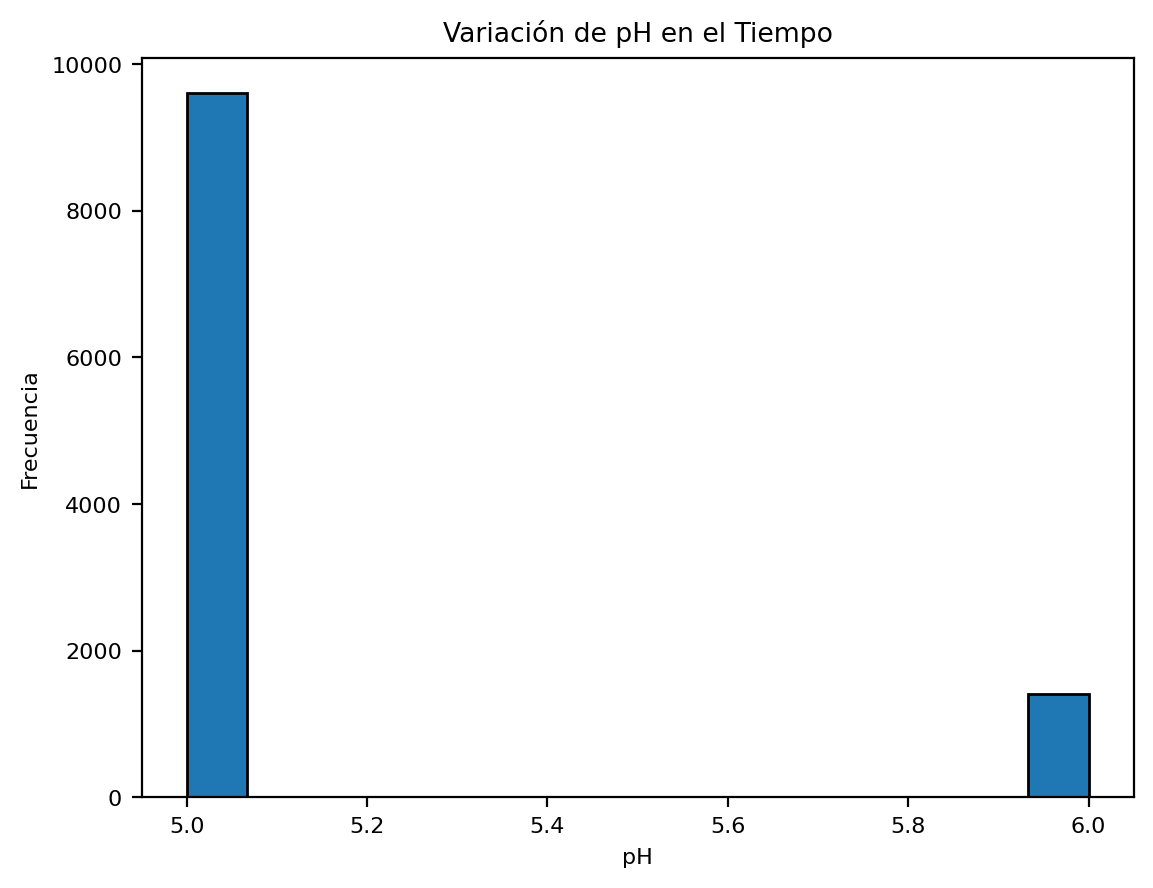

In [44]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['pH'], bins='auto', edgecolor='black')

# Establecer las etiquetas x/y y el título del gráfico
plt.pyplot.xlabel("pH")
plt.pyplot.ylabel("Frecuencia")
plt.pyplot.title("Variación de pH en el Tiempo")

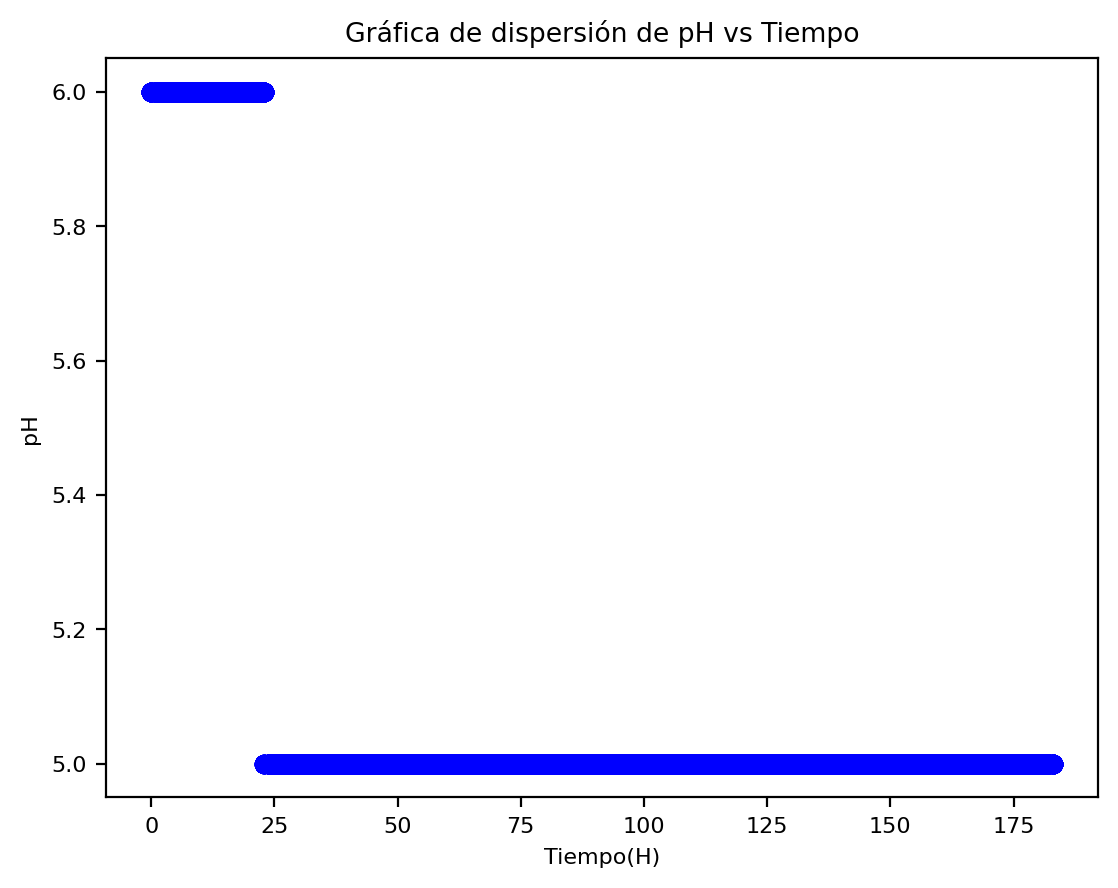

In [45]:
import matplotlib.pyplot as plt

plt.scatter(df['Tiempo(H)'], df['pH'], color='blue', marker='o')
plt.title('Gráfica de dispersión de pH vs Tiempo')
plt.ylabel('pH')
plt.xlabel('Tiempo(H)')
plt.show()

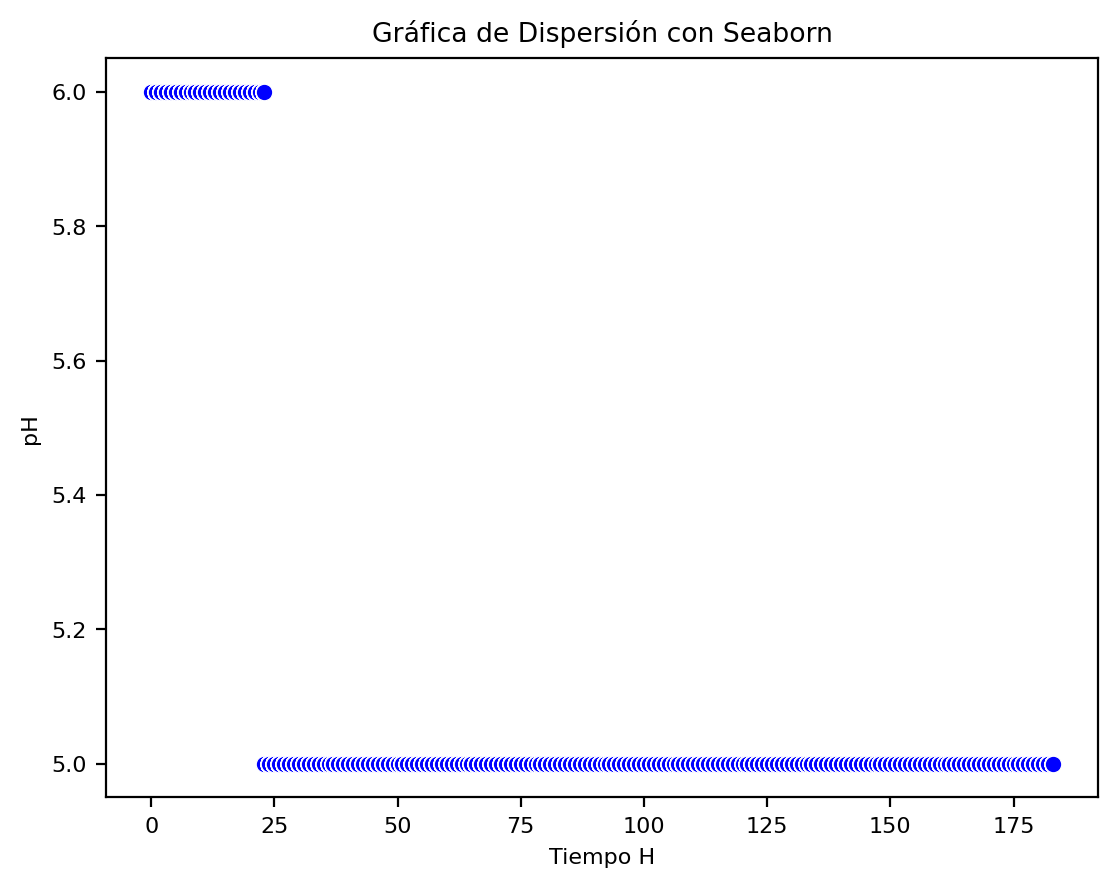

In [48]:
sns.scatterplot(x='Tiempo(H)', y='pH', data = df, color='blue')

plt.title("Gráfica de Dispersión con Seaborn")
plt.xlabel("Tiempo H")
plt.ylabel("pH")

plt.show()

Los datos de pH en el tiempo muestran que a medida transcurre el tiempo hay una disminución del pH, indicando actividad metabolica. Adicionalmente, de la grafica podemos encontrar que la mayoria de datos se mantienen en el rango de pH en un valor cercano a pH 5, mostrando estabilidad, asociada a la llegada de la fase de latencia de la cepa.

In [50]:
print(f"Skewness: {df['pH'].skew()}")
print(f"Kurtosis: {df['pH'].kurt()}")

Skewness: 2.225312035502259
Kurtosis: 2.9525499133312314


Según los calculos estadisticos realizados entendemos que:

Kurtosis: Existe una baja concentración de los valores en torno a su media. Los datos tienen una mayor propensión a valores extremos.

En cuanto a la simetria de la distribucion de los datos:
Skewness: La cola Izquierda (los valores altos) de la distribución es más larga o está más extendida que la cola Derecha.

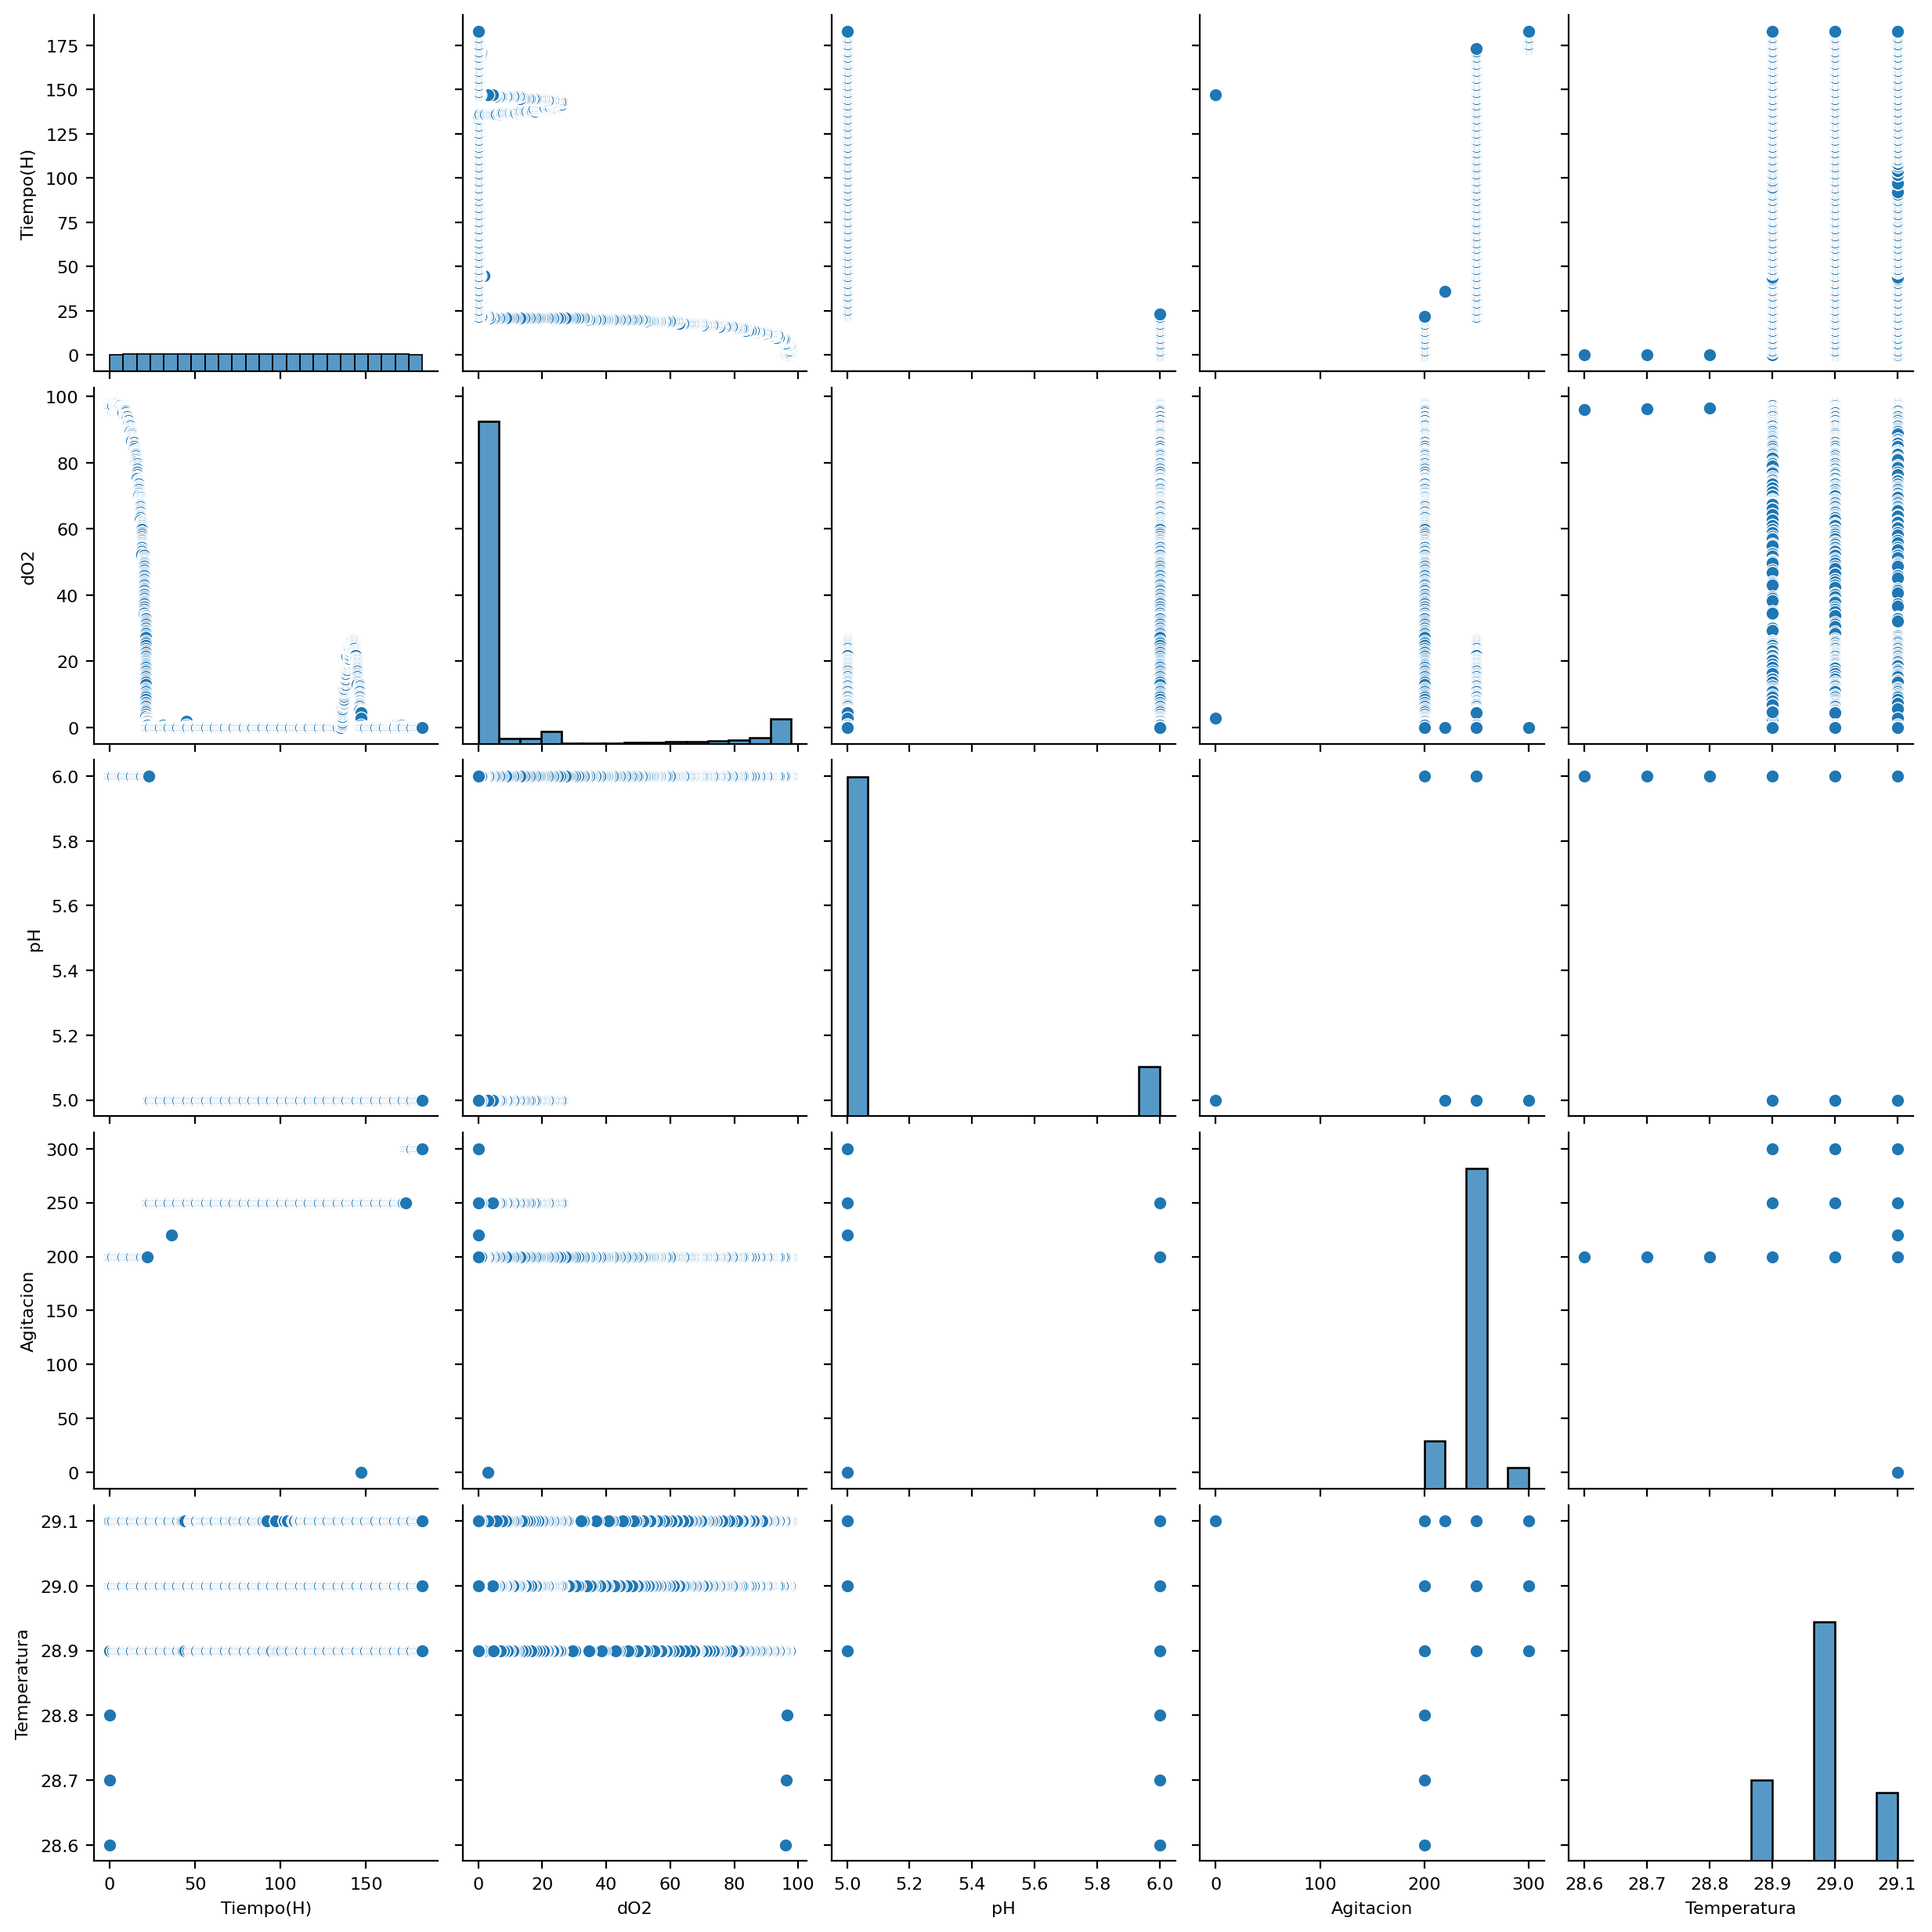

In [47]:
# Relationships between variables

sns.pairplot(df)

La mayoria de los gráficos anteriores muestran que la relacion entre las variables tiende a ser lineal horizontal o vertical, si embargo, pareciese que pudiesen agruparse por como se muestran graficados. Caso tal, como el de la variable pH y dO2 (Concentracion de oxigeno disuelto en el medio) que aislando los datos por grupos separados tendriamos pendientes de cero o cercanos a este valor.

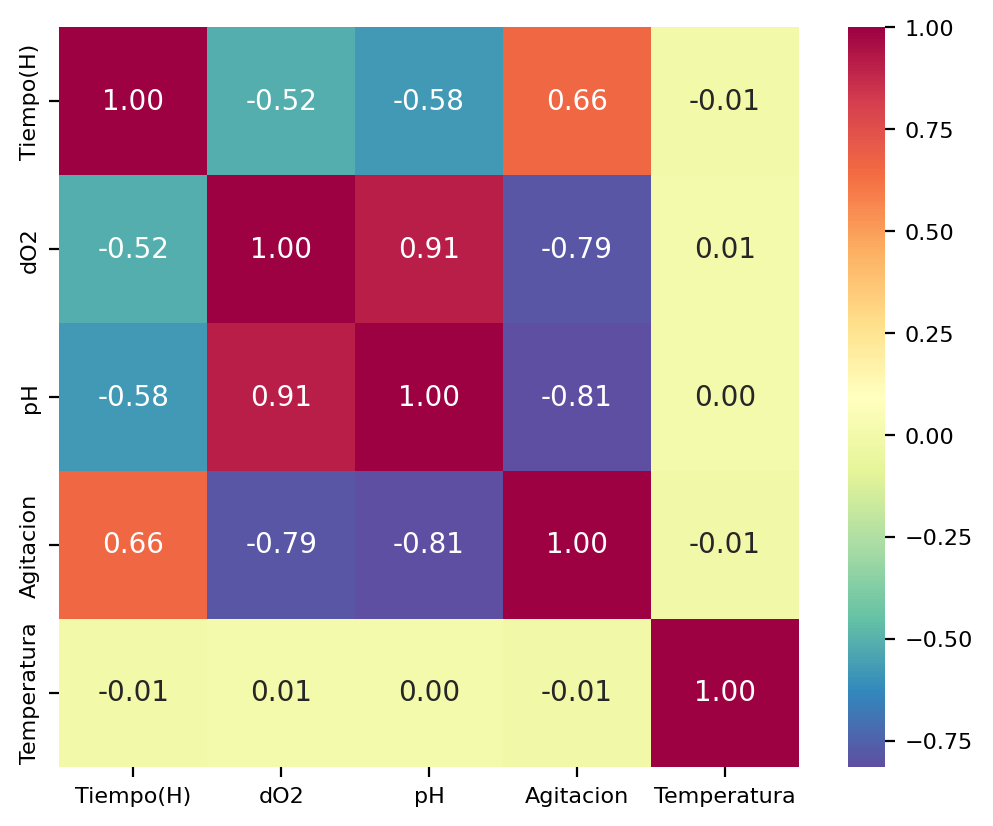

In [49]:
# Correlacion entre variables

corrmat = df.corr()
hm = sns.heatmap(corrmat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=df.columns,
                 xticklabels=df.columns,
                 cmap="Spectral_r")
plt.show()


Vemos una fuerte correlación entre dO2 y pH.

La temperatura al ser una variable controlada, vemos que no tiene influencia sobre las demas variables.

Contrario, vemos que el dO2 tiene una alta correlación negativa (Inversa) con la agitación, mostrando la influencia de los fenomenos de transporta en como se solubiliza el O2 en el medio.

Mientras que la relación entre pH y dO2 muestran una correlación cercana a uno, una relacion que indica que al aumentar el pH en el medio, aumentaria el dO2 en el mismo o de forma inversa, al disminuir uno, el otro tambien disminuye.